In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df1=pd.read_csv("/content/email_opened_table.csv")
df1

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034
...,...
10340,990213
10341,918210
10342,200299
10343,211104


In [191]:
df2=pd.read_csv("/content/email_table.csv")
df2

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6
...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5
99996,899722,long_email,personalized,7,Saturday,US,1
99997,449610,long_email,personalized,11,Saturday,UK,6
99998,72497,short_email,generic,10,Monday,UK,0


In [192]:
df3=pd.read_csv("/content/link_clicked_table.csv")
df3

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561
...,...
2114,873162
2115,435454
2116,206772
2117,742967


In [193]:
df2['EO'] = np.where(df2['email_id'].isin(df1['email_id']), 1, 0)
df2

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,EO
0,85120,short_email,personalized,2,Sunday,US,5,0
1,966622,long_email,personalized,12,Sunday,UK,2,1
2,777221,long_email,personalized,11,Wednesday,US,2,0
3,493711,short_email,generic,6,Monday,UK,1,0
4,106887,long_email,generic,14,Monday,US,6,0
...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,0
99996,899722,long_email,personalized,7,Saturday,US,1,0
99997,449610,long_email,personalized,11,Saturday,UK,6,0
99998,72497,short_email,generic,10,Monday,UK,0,0


In [194]:
df2['LO'] = np.where(df2['email_id'].isin(df3['email_id']), 1, 0)
df2

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,EO,LO
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0
...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,0,0
99996,899722,long_email,personalized,7,Saturday,US,1,0,0
99997,449610,long_email,personalized,11,Saturday,UK,6,0,0
99998,72497,short_email,generic,10,Monday,UK,0,0,0


In [195]:
df2['EO'].value_counts()

,count
EO,
0,89655
1,10345


In [196]:
df2['LO'].value_counts()

,count
LO,
0,97881
1,2119


    **
    No. of people who opened the email=10345
    No. of people who didnt open the email=89655
    No. of people who opened the email but didnt open the link=8226
    No. of people who opened the link=2119
    **

***
Percentage of people who opened the email=(10345/100000)*100 = 10.345%

Percentage of people who opened the link=(2119/10345)*100 = 20.48%

***

In [197]:
df2['email_version'].value_counts()

,count
email_version,
generic,50209
personalized,49791


In [198]:
personalized_emails = df2[df2['email_version'] == 'personalized']

In [199]:
personalized_opened_links = personalized_emails[personalized_emails['LO'] == 1]

In [200]:
num_personalized_opened_links = len(personalized_opened_links)
print(f"Number of personalized emails with opened links: {num_personalized_opened_links}")

Number of personalized emails with opened links: 1359


In [201]:
df2['user_country'].value_counts()

,count
user_country,
US,60099
UK,19939
FR,9995
ES,9967


In [14]:
!pip install shap

In [202]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is called df
label_enc = LabelEncoder()

# Columns to encode
cols_to_encode = ['email_text', 'email_version', 'user_country', 'weekday']

# Apply label encoding
for col in cols_to_encode:
    df2[col] = label_enc.fit_transform(df2[col])

In [203]:
df2.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,EO,LO
0,85120,1,1,2,3,3,5,0,0
1,966622,0,1,12,3,2,2,1,1
2,777221,0,1,11,6,3,2,0,0
3,493711,1,0,6,1,2,1,0,0
4,106887,0,0,14,1,3,6,0,0


In [204]:
for col in cols_to_encode:
    label_enc = LabelEncoder()
    df2[col] = label_enc.fit_transform(df2[col])
    print(f"{col} mapping: {dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))}")

email_text mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
email_version mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
user_country mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3)}
weekday mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6)}


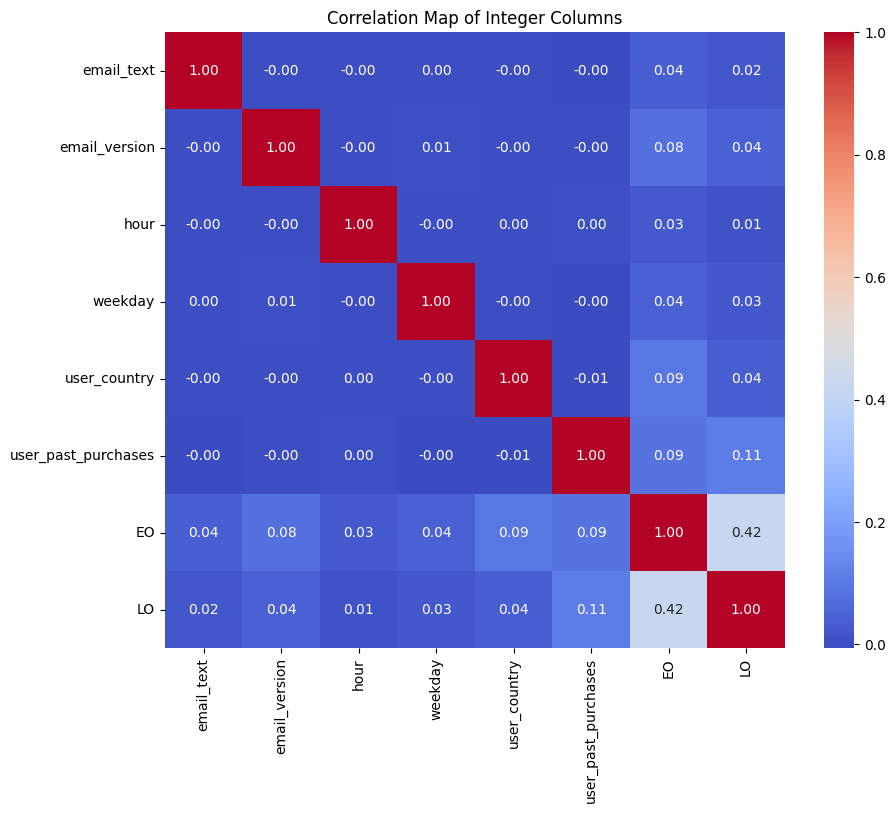

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfx=df2.drop(['email_id'],axis='columns')
# Select only integer columns
integer_columns = dfx.select_dtypes(include=['int64', 'int32', 'int16', 'int8'])

# Calculate the correlation matrix
correlation_matrix = integer_columns.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map of Integer Columns')
plt.show()

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

In [207]:
# 1. Define features and target
X = df2.drop(columns=['email_id', 'EO', 'LO','email_version'])  # Drop ID and targets
y = df2['EO']  # Target variable: whether user clicked

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
!pip install imbalanced-learn

In [208]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Assuming X_train and y_train are your features and target variable
print('Original dataset shape:', Counter(y_train))

# Initialize SMOTETomek
smt = SMOTETomek(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape:', Counter(y_resampled))

Original dataset shape: Counter({0: 71747, 1: 8253})
Resampled dataset shape: Counter({0: 71725, 1: 71725})


In [209]:
X_resampled

,email_text,hour,weekday,user_country,user_past_purchases
0,0,6,1,0,0
1,1,9,1,3,9
2,1,11,0,3,1
3,0,11,6,3,3
4,0,5,3,2,5
...,...,...,...,...,...
143445,1,9,6,3,4
143446,1,9,5,2,5
143447,1,11,4,3,3
143448,0,12,5,3,3


In [210]:
y_resampled

,EO
0,0
1,0
2,0
3,0
4,0
...,...
143445,1
143446,1
143447,1
143448,1


In [211]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **Using XGBoost Classifier**

In [212]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np

In [213]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [6, 10, 15, 20, 25],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1.0],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 5, 10]
}

In [214]:
# 2. Instantiate base XGBoost model with GPU params
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='gpu_hist',        # Use GPU histogram-based tree building
    predictor='gpu_predictor',     # GPU-accelerated prediction
    booster='gbtree',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [215]:
# 3. RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,                     # Number of combinations to try
    scoring='accuracy',
    cv=5,                          # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [216]:
# 4. Fit the model
random_search.fit(X_train1, y_train1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:01:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:01:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           lear...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor='gpu_predictor', ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5, 1.0],
                                        'max_depth': [6, 10, 15, 20, 25],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [217]:
# 5. Best model evaluation
best_model = random_search.best_estimator_
y_pred_xgb = best_model.predict(X_test1)
accuracy = accuracy_score(y_test1, y_pred_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [218]:
y_proba_xgb = best_model.predict_proba(X_test1)[:, 1]

In [219]:
print("Best Parameters Found:", random_search.best_params_)
print(f"Accuracy after tuning: {accuracy:.4f}")

Best Parameters Found: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 20, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Accuracy after tuning: 0.7283


# **Optimizing the click through rate of link through various methods**

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-113-3a34e986ada4>:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_1, X_train1)


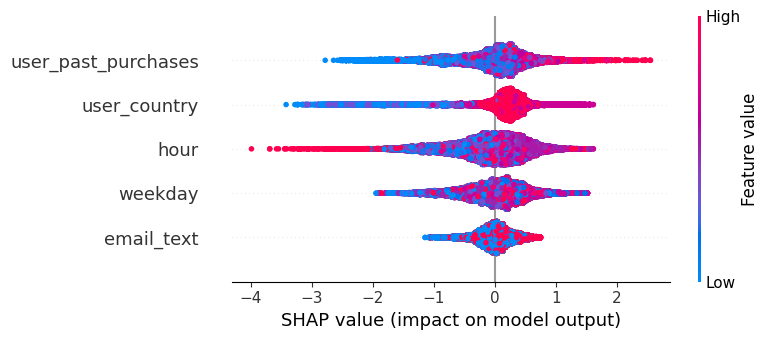

In [113]:
# SHAP for EO
explainer_1 = shap.TreeExplainer(best_model)
shap_values_1 = explainer_1.shap_values(X_train1)
shap.summary_plot(shap_values_1, X_train1)

In [127]:
# 3. Stage 2: Link Click Prediction (LO | EO = 1)
opened_emails = df2[df2['EO'] == 1].copy()
X2 = opened_emails.drop(columns=['email_id', 'email_version','EO', 'LO'])
y2 = opened_emails['LO']

In [128]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [129]:
link_open_model = xgb.XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state=42)
link_open_model.fit(X_train2, y_train2)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:36:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:36:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, predictor='gpu_predictor', ...)

In [130]:
y_pred2 = link_open_model.predict(X_test2)
y_proba2 = link_open_model.predict_proba(X_test2)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:37:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [131]:
print("\n Link Click Report:")
print(classification_report(y_test2, y_pred2))
print("ROC-AUC (Link Click):", roc_auc_score(y_test2, y_proba2))


 Link Click Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1690
           1       0.39      0.09      0.15       379

    accuracy                           0.81      2069
   macro avg       0.61      0.53      0.52      2069
weighted avg       0.75      0.81      0.76      2069

ROC-AUC (Link Click): 0.6061685219590639


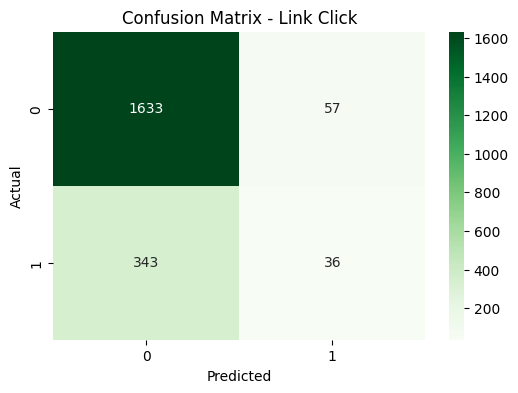

In [132]:
# Confusion Matrix for LO
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Link Click")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<ipython-input-133-8decb18695f3>:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_2, X_train2)


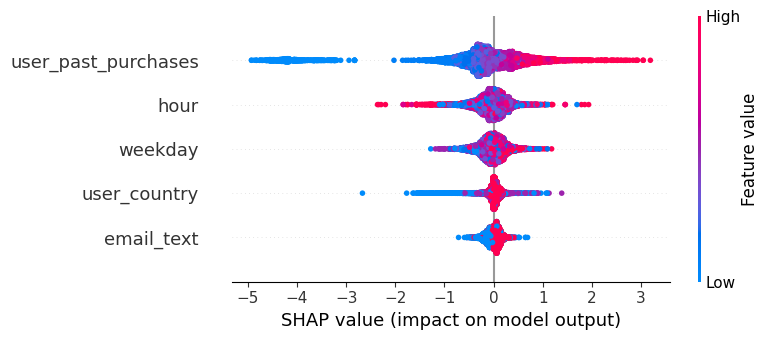

In [133]:
# SHAP for LO
explainer_2 = shap.TreeExplainer(link_open_model)
shap_values_2 = explainer_2.shap_values(X_train2)
shap.summary_plot(shap_values_2, X_train2)

In [134]:
X_test1.shape

(28690, 5)

In [135]:
X_test2.shape

(2069, 5)

In [136]:
len(y_proba_xgb)

28690

In [137]:
y_proba_xgb

array([0.2577459 , 0.6730677 , 0.48363855, ..., 0.81917673, 0.72915494,
       0.79104507], dtype=float32)

In [138]:
X_test1

,email_text,hour,weekday,user_country,user_past_purchases
40660,0,10,3,3,2
97832,0,7,3,3,5
77246,1,20,5,3,7
116996,1,3,1,3,5
127824,1,11,4,3,3
...,...,...,...,...,...
40110,1,11,1,3,2
93818,1,16,3,3,3
68597,0,1,5,3,1
141407,0,1,2,3,2


In [139]:
# 4. Combined Conversion Score (Open * Click Probabilities)
# Apply on same input space (X1_test)
final_conversion_score = y_proba_xgb * link_open_model.predict_proba(X_test1)[:, 1]
df_conversion = pd.DataFrame({
    "Final_Conversion_Prob": final_conversion_score,
    "EO_Prob": y_proba_xgb,
    "LO_Prob": link_open_model.predict_proba(X_test1)[:, 1]
})

In [140]:
df_conversion

,Final_Conversion_Prob,EO_Prob,LO_Prob
0,0.029634,0.257746,0.114973
1,0.105379,0.673068,0.156565
2,0.022125,0.483639,0.045748
3,0.088932,0.604231,0.147182
4,0.104207,0.763386,0.136506
...,...,...,...
28685,0.124759,0.610041,0.204509
28686,0.048808,0.296105,0.164834
28687,0.043527,0.819177,0.053135
28688,0.075225,0.729155,0.103167


# **Evaluation of the Optimization algorithm's efficiency**

In [141]:
# Ensure df2 index matches df_conversion's index (e.g., X_test1.index)
# If not already aligned, align them like this:
df2_subset = df2.loc[df_conversion.index, ['LO', 'EO']]

# Add actual labels to df_conversion
df_conversion['Actual_LO'] = df2_subset['LO'].values
df_conversion['Actual_EO'] = df2_subset['EO'].values

In [142]:
df_conversion

,Final_Conversion_Prob,EO_Prob,LO_Prob,Actual_LO,Actual_EO
0,0.029634,0.257746,0.114973,0,0
1,0.105379,0.673068,0.156565,1,1
2,0.022125,0.483639,0.045748,0,0
3,0.088932,0.604231,0.147182,0,0
4,0.104207,0.763386,0.136506,0,0
...,...,...,...,...,...
28685,0.124759,0.610041,0.204509,0,1
28686,0.048808,0.296105,0.164834,0,0
28687,0.043527,0.819177,0.053135,0,0
28688,0.075225,0.729155,0.103167,0,0


In [143]:
# Top-K Evaluation
k_percent = 0.2
k = int(len(df_conversion) * k_percent)

# Sort by predicted Final Conversion Probabilities
df_sorted = df_conversion.sort_values(by="Final_Conversion_Prob", ascending=False)

# Take Top-K rows
top_k = df_sorted.head(k)

# Calculate Click-Through Rates
baseline_ctr = df_sorted["Actual_LO"].mean()
top_k_ctr = top_k["Actual_LO"].mean()

# Output
print(f"\nBaseline CTR (LO): {baseline_ctr:.3f}")
print(f"Top {k_percent*100:.0f}% CTR (LO): {top_k_ctr:.3f}")


Baseline CTR (LO): 0.022
Top 20% CTR (LO): 0.023


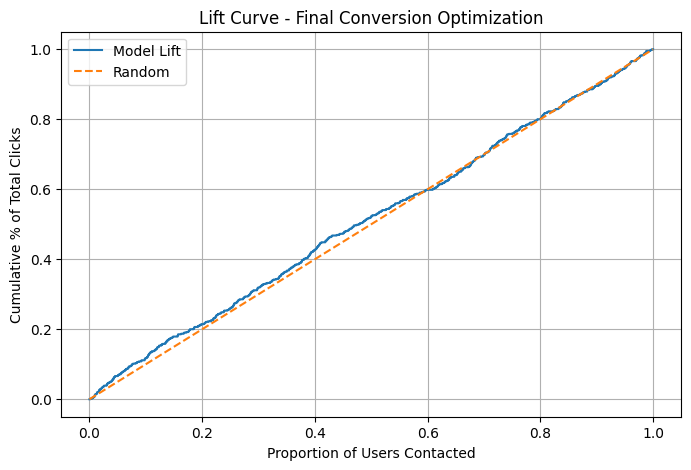

In [144]:
# Lift Curve
cumulative_actual = df_sorted['Actual_LO'].cumsum()
total_clicks = cumulative_actual.iloc[-1]
lift = cumulative_actual / total_clicks

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(lift)) / len(lift), lift, label='Model Lift')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel("Proportion of Users Contacted")
plt.ylabel("Cumulative % of Total Clicks")
plt.title("Lift Curve - Final Conversion Optimization")
plt.legend()
plt.grid(True)
plt.show()

In [145]:
# T-test for significance
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(top_k['Actual_LO'], df_sorted['Actual_LO'])
print(f"\nT-test p-value: {p_value:.4f}")


T-test p-value: 0.4584


In [146]:
# A/B Test Simulation
np.random.seed(42)
df_sorted['Group'] = np.where(np.random.rand(len(df_sorted)) < 0.5, 'A (Random)', 'B (Optimized)')
df_sorted.loc[df_sorted['Group'] == 'B (Optimized)', 'Group'] = (
    ['B (Optimized)'] * len(df_sorted.loc[df_sorted['Group'] == 'B (Optimized)'].index)
)

In [147]:
# Manually assign top K to Optimized, others to Random
df_sorted['Group'] = 'A (Random)'
df_sorted.iloc[:k, df_sorted.columns.get_loc('Group')] = 'B (Optimized)'

ctr_group = df_sorted.groupby('Group')['Actual_LO'].mean()
print("\nA/B Test CTR Comparison:")
print(ctr_group)


A/B Test CTR Comparison:
Group
A (Random)       0.021218
B (Optimized)    0.023179
Name: Actual_LO, dtype: float64


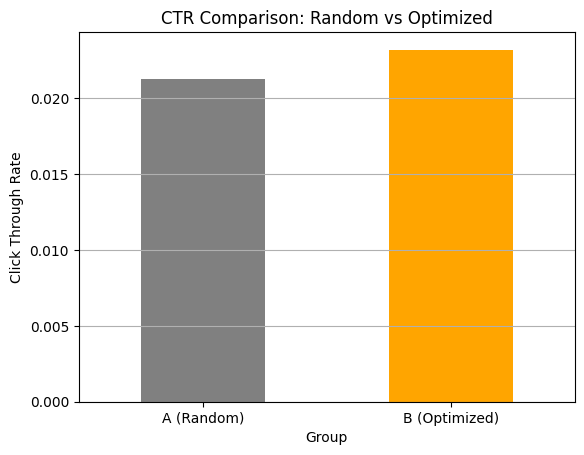

In [148]:
# Plot
ctr_group.plot(kind='bar', color=['gray', 'orange'])
plt.title("CTR Comparison: Random vs Optimized")
plt.ylabel("Click Through Rate")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()